# BoomBike MLR Assignment

## Multiple Linear Regression 

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 



They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
  
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Reading the understanding Data

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
print("\nDataset Shape:", bike.shape)
print("\nMissing Values in Each Column:")
print(bike.isnull().sum())


Dataset Shape: (730, 16)

Missing Values in Each Column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
print("\nStatistical Summary:")
print(bike.describe())


Statistical Summary:
          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std  

In [6]:
bike.shape

(730, 16)

### Checking for duplicate records

In [7]:
# Check for duplicate rows (returns a Boolean Series)
duplicates = bike.duplicated()

# Print if there are any duplicates
print("Any duplicates:", duplicates.any())

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Any duplicates: False
Number of duplicate rows: 0


In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping unnecessory columns. (instant index, dteday can be dropped because we have moth year and weekday, casual and registered are just cnt when combined)

In [10]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping data for better readability

In [13]:
bike.season = bike.season.map({1:'spring', 2:'summer', 3: 'fall', 4:'winter'})

In [14]:
bike.weathersit = bike.weathersit.map({1:'Clear, Partly cloudy',
                                       2:'Misty + Cloudy',
                                       3: 'Light rain Snow',
                                       4:'Heavy Rain Snow + Fog'})

In [15]:
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [16]:
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
# bike.yr = bike.yr.map({0:'2018',1:'2019'})

In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# EDA: Data Visualization and outlier detection

<Axes: xlabel='season', ylabel='cnt'>

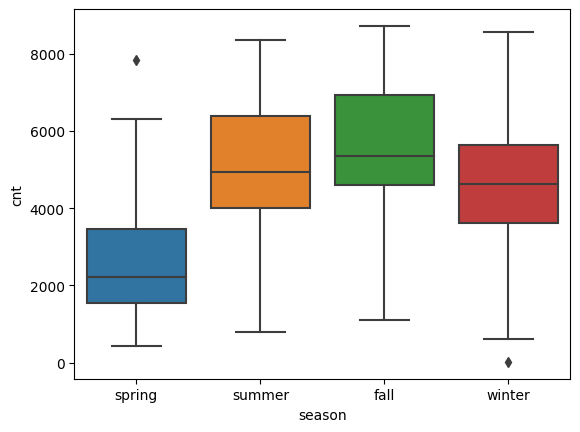

In [19]:
sns.boxplot(x='season', y='cnt', data=bike)


<Axes: xlabel='weekday', ylabel='cnt'>

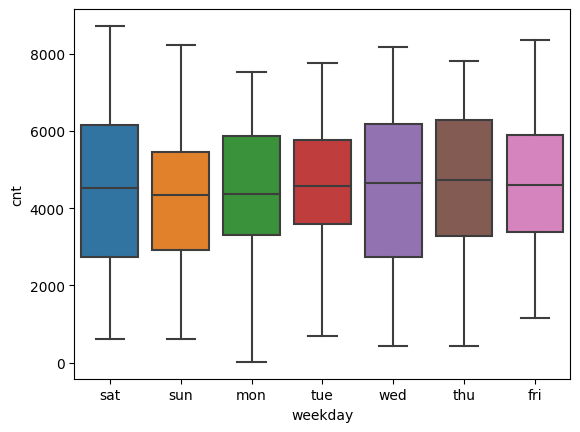

In [20]:
sns.boxplot(x='weekday', y='cnt', data=bike)

<Axes: xlabel='holiday', ylabel='cnt'>

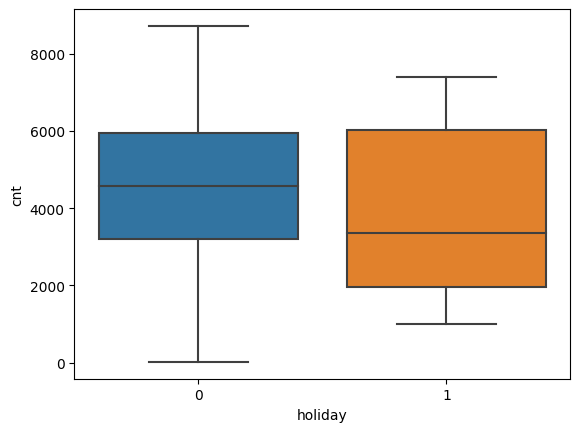

In [21]:
sns.boxplot(x='holiday', y='cnt', data=bike)

<Axes: xlabel='mnth', ylabel='cnt'>

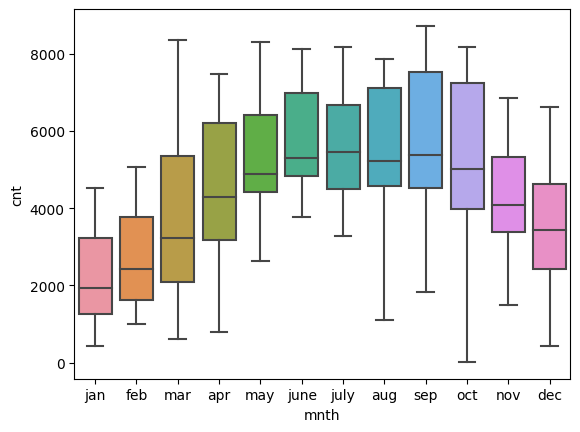

In [22]:
sns.boxplot(x='mnth', y='cnt', data=bike)

<Axes: xlabel='yr', ylabel='cnt'>

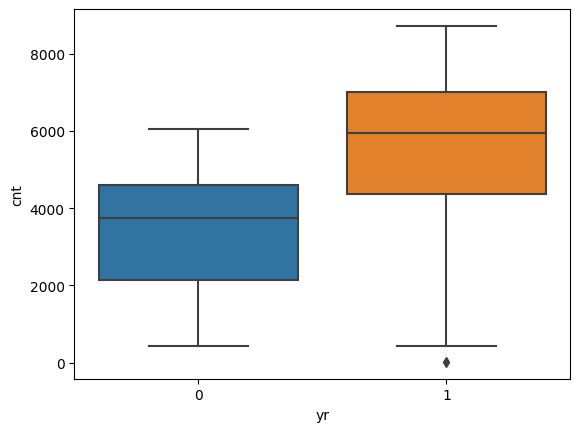

In [23]:
sns.boxplot(x='yr', y='cnt', data=bike)

<Axes: xlabel='mnth', ylabel='cnt'>

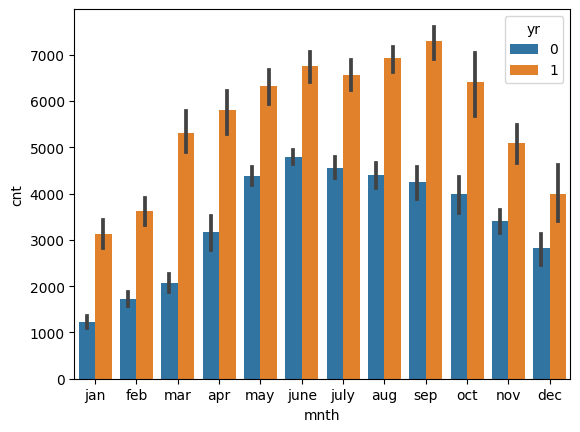

In [24]:
sns.barplot(x='mnth', y='cnt', hue='yr', data=bike)

Bookings has increased in year 2019 as compared to 2018 showing a trend of growth and the month june, july, August, September (sep topping the 2019 list) of 2019 has the most of booking against may, june(topping the 2019 list) july august had most booking from 2018

In [25]:
# sns.displot(x='registered', y='casual', hue='mnth', data=bike)

In [26]:
# bike.registered.sum()

In [27]:
# bike.casual.sum()

<Axes: xlabel='weathersit', ylabel='cnt'>

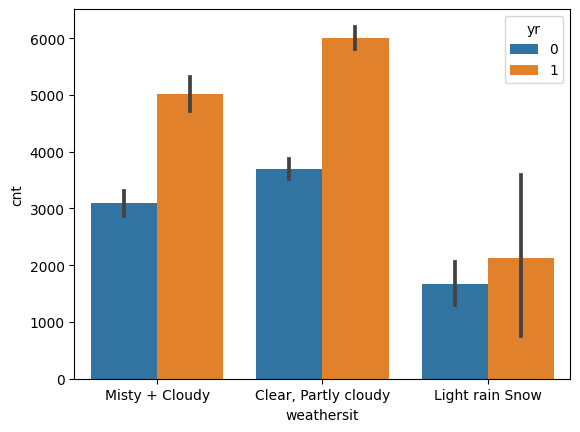

In [28]:
sns.barplot(data=bike, x='weathersit', y='cnt', hue='yr')

Based on above figure we can conclude that most of the bike rental happen in clear weather and it drops when the weather is rainy or snowy and there has been a significant increase in bookings for each season from 2018 to 2019

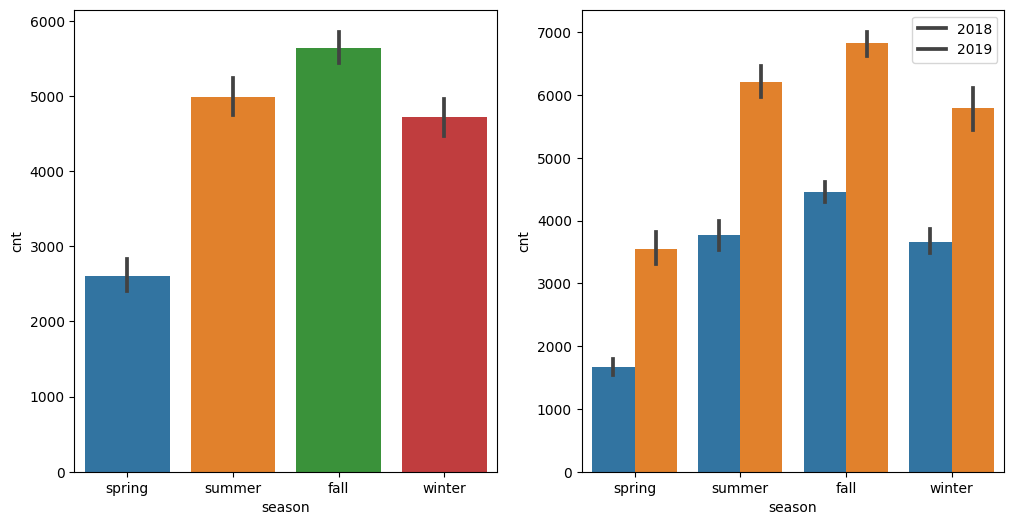

In [29]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='season', y='cnt', data=bike)
plt.subplot(1,2,2)
sns.barplot(x='season', y='cnt', data=bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

From the above figure we can see the fall season attracts more bike rentals

In [30]:
bike.weathersit.value_counts()

weathersit
Clear, Partly cloudy    463
Misty + Cloudy          246
Light rain Snow          21
Name: count, dtype: int64

<Axes: xlabel='holiday', ylabel='cnt'>

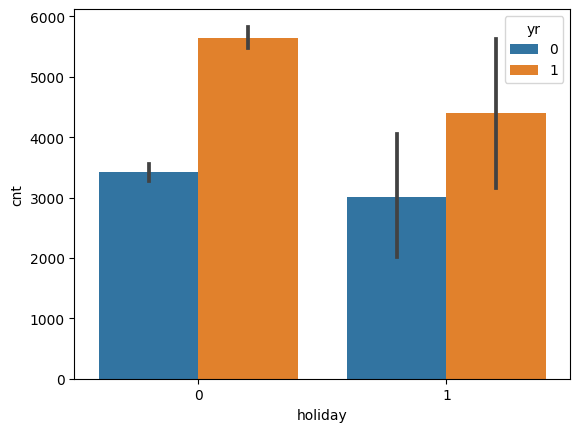

In [31]:
sns.barplot(x='holiday', y='cnt', data=bike, hue='yr')

People are more interested is booking for holiday which we guessed intuitively while understanding data

<Axes: xlabel='yr', ylabel='cnt'>

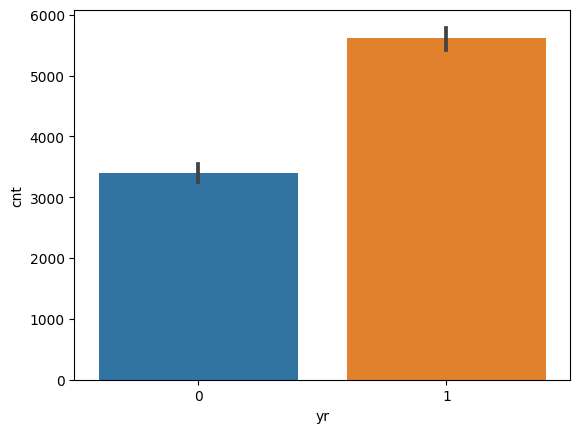

In [32]:
sns.barplot(data=bike, x='yr', y='cnt')

Looking at our previous observation we notice a good increase of trend in booking which is also confirmed in our above figure

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

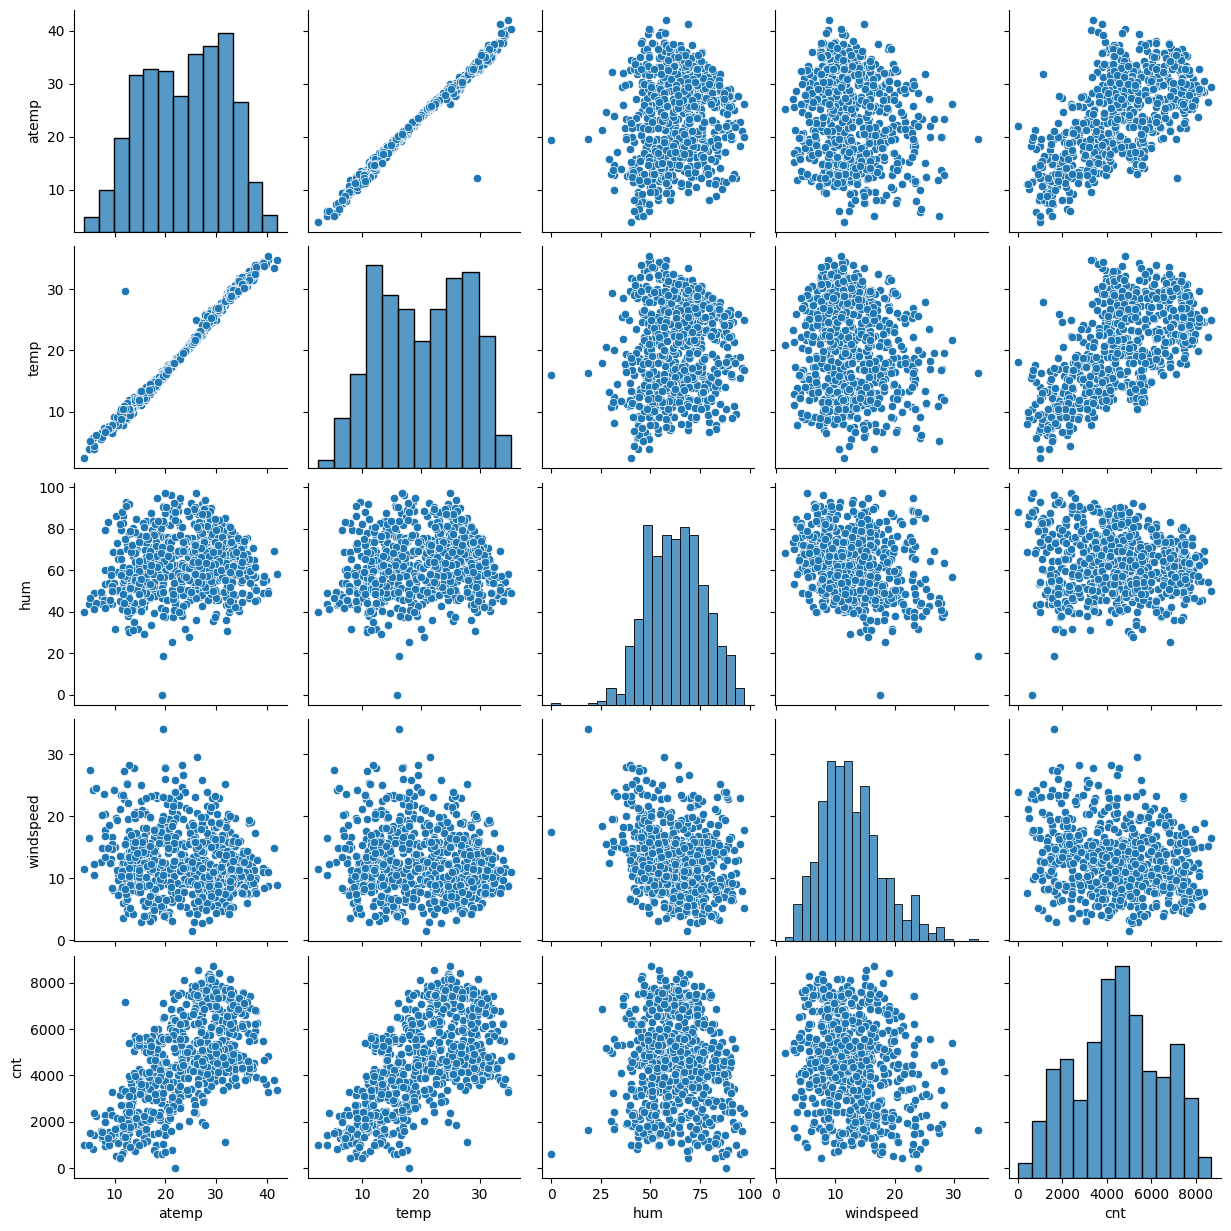

In [33]:
# Analysing/visualizing the numerical columns
numeric_col = ['atemp', 'temp','hum','windspeed','cnt']

sns.pairplot(data=bike,vars=numeric_col)
plt.show()

In [34]:
bike[numeric_col].corr()

,atemp,temp,hum,windspeed,cnt
atemp,1.000000,0.991696,0.141512,-0.183876,0.630685
temp,0.991696,1.000000,0.128565,-0.158186,0.627044
hum,0.141512,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.183876,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.630685,0.627044,-0.098543,-0.235132,1.000000


<Axes: >

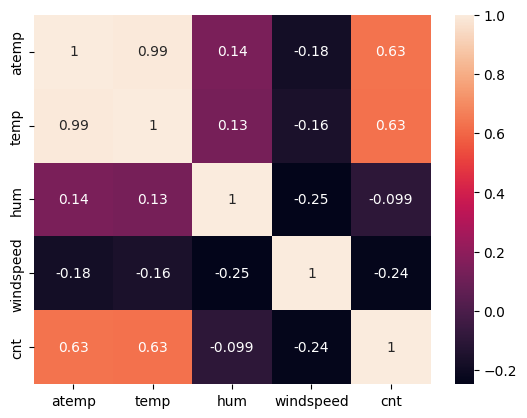

In [35]:
sns.heatmap(bike[numeric_col].corr(), annot=True)

In the data dictionary we noticed that the temp and atemp columns are very correlated and the above correlation figure comfirms the same so we shall remove on of them to avoide the multicollinearity

# Data Prepration 

In [36]:
# dummy variable preparation

months = pd.get_dummies(bike.mnth, drop_first=True).astype(int)
weekdays = pd.get_dummies(bike.weekday, drop_first=True).astype(int)
weathersit = pd.get_dummies(bike.weathersit, drop_first=True).astype(int)
season = pd.get_dummies(bike.season, drop_first=True).astype(int)

In [37]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [38]:
bike_new = pd.concat([bike,months,weekdays,weathersit,season],axis=1)

In [39]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light rain Snow,Misty + Cloudy,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty + Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty + Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [40]:
bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [41]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light rain Snow,Misty + Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [42]:
bike_new.shape

(730, 30)

# Performing train test split

In [43]:
df_train, df_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [44]:
print(df_train.shape, "\n")
print(df_test.shape, "\n")

(510, 30) 

(220, 30) 



In [45]:
scaler = MinMaxScaler()

In [46]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light rain Snow,Misty + Cloudy,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [47]:
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])

In [48]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light rain Snow,Misty + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light rain Snow,Misty + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

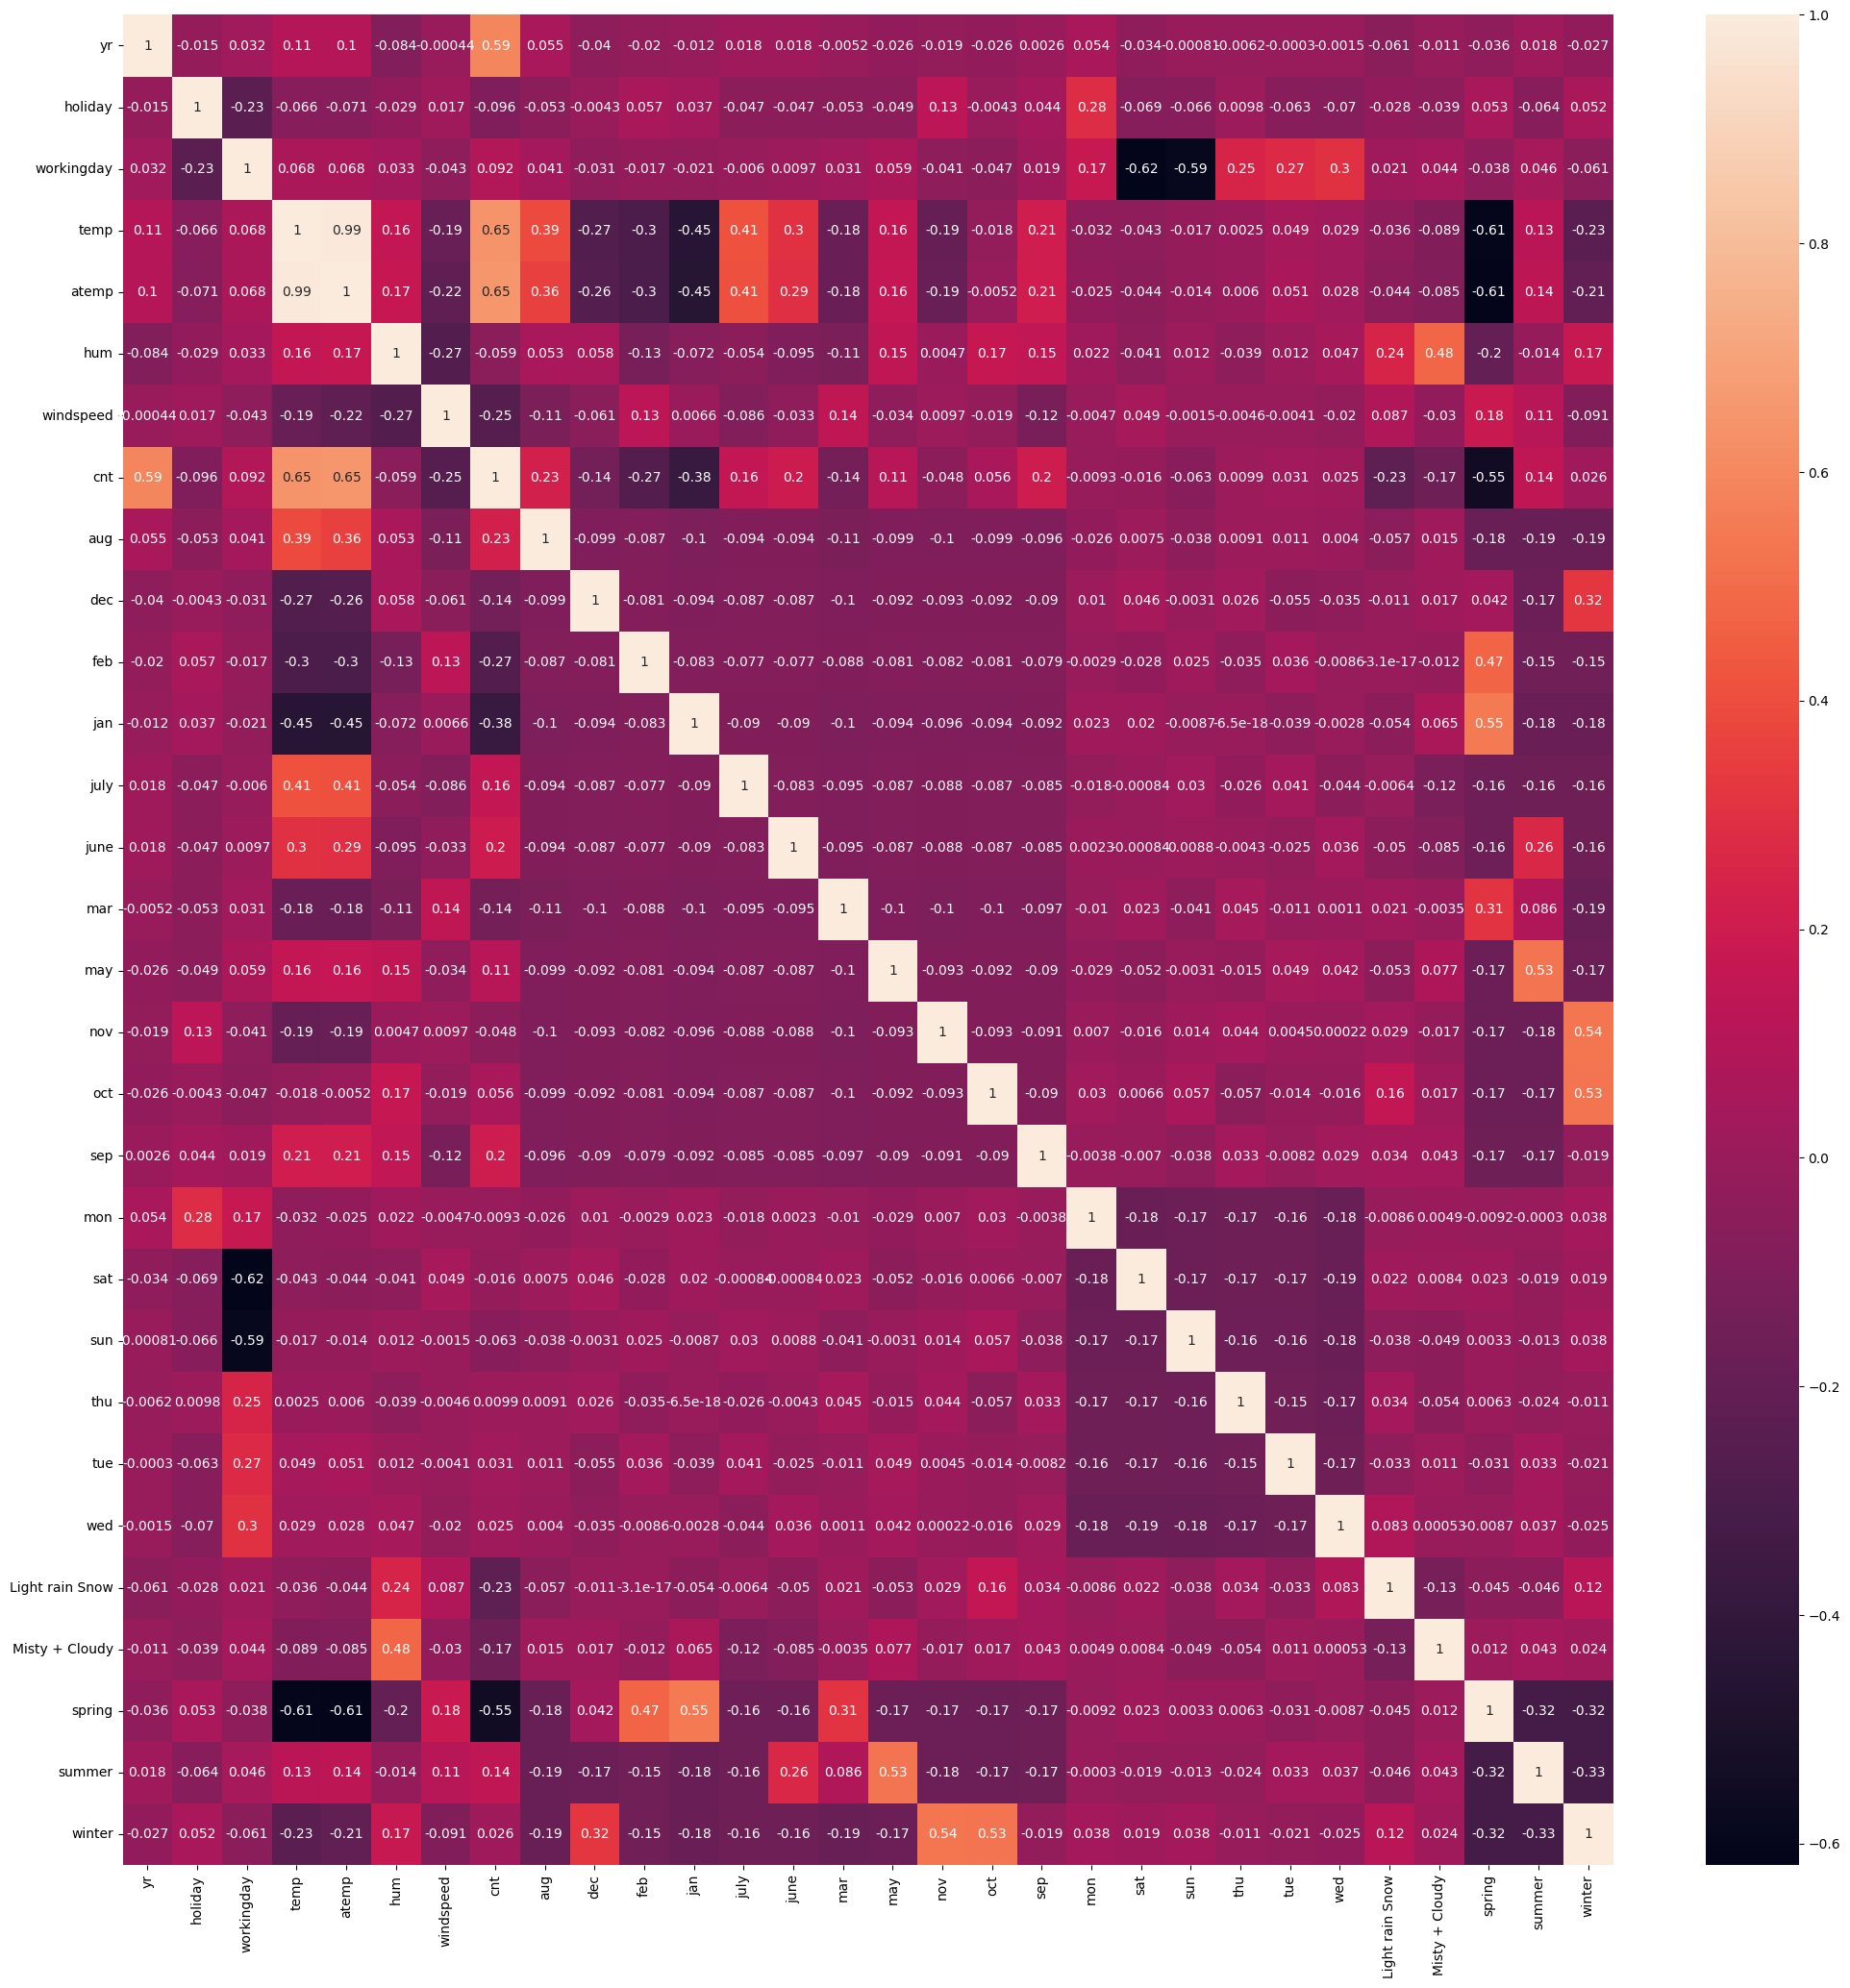

In [50]:
# Select only numeric columns
plt.figure(figsize = (25,25))
# Calculate correlations
corr_matrix = df_train.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True)

We noticed that the var temp and atemp are comparativelty high correlated to our target var cnt

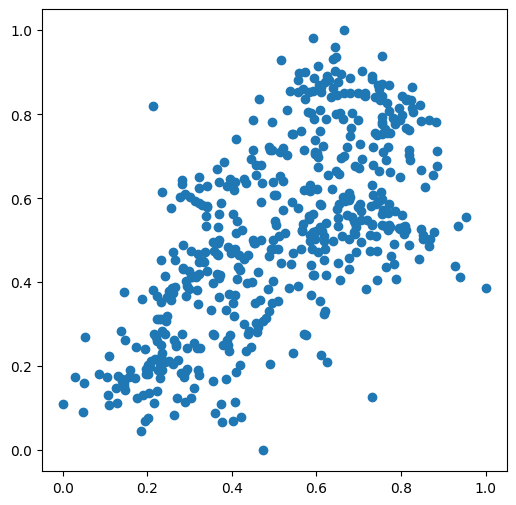

In [51]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

As we found in our correlation matrix figure  the temp was having good relation with our target variable cnt and the same can be confirmed with this scatterplot which shows a postive trend

# Performing feature elemination (Recursive Feature Elimination, VIF)

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

In [53]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe  = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light rain Snow', True, 1),
 ('Misty + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [55]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Light rain Snow', 'Misty + Cloudy', 'spring',
       'summer', 'winter'],
      dtype='object')


In [56]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [57]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
X_train_rfe = X_train[col]

In [59]:
# calculate VIF

calculateVIF(X_train_rfe)



,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Misty + Cloudy,1.57


# Model Building

In [60]:
X_train_LM_1 = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train, X_train_LM_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          2.11e-191
Time:                        21:21:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

### Checking VIF and removing high VIF values

In [61]:
# X_train_new = X_train_rfe.drop(['temp'], axis = 1)
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Misty + Cloudy,1.57


In [62]:
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Misty + Cloudy,2.30
0,yr,2.08
5,july,1.59
6,sep,1.39


In [63]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
11,summer,2.24
10,spring,2.13
0,yr,2.07
12,winter,1.84
4,july,1.59
9,Misty + Cloudy,1.56
5,sep,1.34
6,sat,1.23


VIFs are looking in good shape now as compared with before dropping significant higher VIF value columns. Now let's make it even better by inspecting the P-Values of our columns 

### Removing columns with high P values

In [64]:
X_train_LM_2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_LM_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          2.11e-191
Time:                        21:21:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

In [65]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.82
3,july,1.59
8,Misty + Cloudy,1.55
4,sep,1.33
5,sat,1.22


In [66]:
X_train_LM_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train, X_train_LM_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          2.06e-186
Time:                        21:21:47   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2003      0.030     

In [67]:
X_train_new = X_train_new.drop(['sat'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
9,summer,2.23
8,spring,2.09
0,yr,2.07
10,winter,1.80
3,july,1.59
7,Misty + Cloudy,1.55
4,sep,1.33
5,sun,1.17


In [68]:
X_train_LM_4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train, X_train_LM_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          3.37e-187
Time:                        21:21:47   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2034      0.030     

In [69]:
X_train_new = X_train_new.drop(['july'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
7,spring,2.00
8,summer,1.91
9,winter,1.64
6,Misty + Cloudy,1.55
3,sep,1.22
4,sun,1.17
5,Light rain Snow,1.08


### Final model after removing High VIF and P values

In [70]:
X_train_LM_5 = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train, X_train_LM_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          5.70e-187
Time:                        21:21:47   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1956      0.030     

Now finally, we have all our columns value below VIF value of 5 and P values in better shape

# Performing Residual Analysis

In [71]:
X_train_LM_4

,const,yr,temp,windspeed,july,sep,sun,Light rain Snow,Misty + Cloudy,spring,summer,winter
576,1.0,1,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,1,1,0,0
728,1.0,1,0.245101,0.663106,0,0,1,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,1,0,1,0
111,1.0,0,0.345824,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0,0,1,0,0,1
79,1.0,0,0.462664,0.529881,0,0,0,0,1,0,1,0


In [72]:
y_train_pred = lm_4.predict(X_train_LM_4)

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

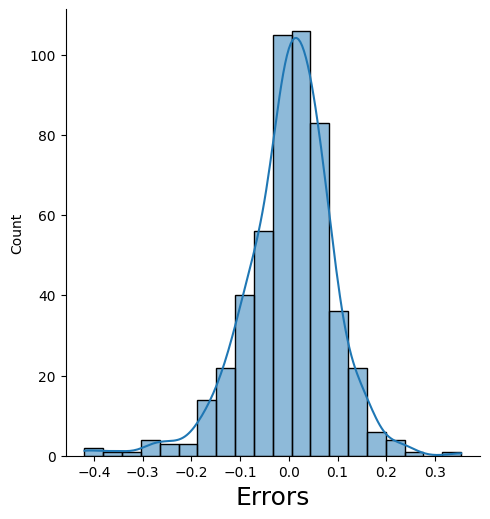

In [73]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.displot((y_train - y_train_pred), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

As we can see mean is zero and it trend follows the bellcurve (Normal distribution)

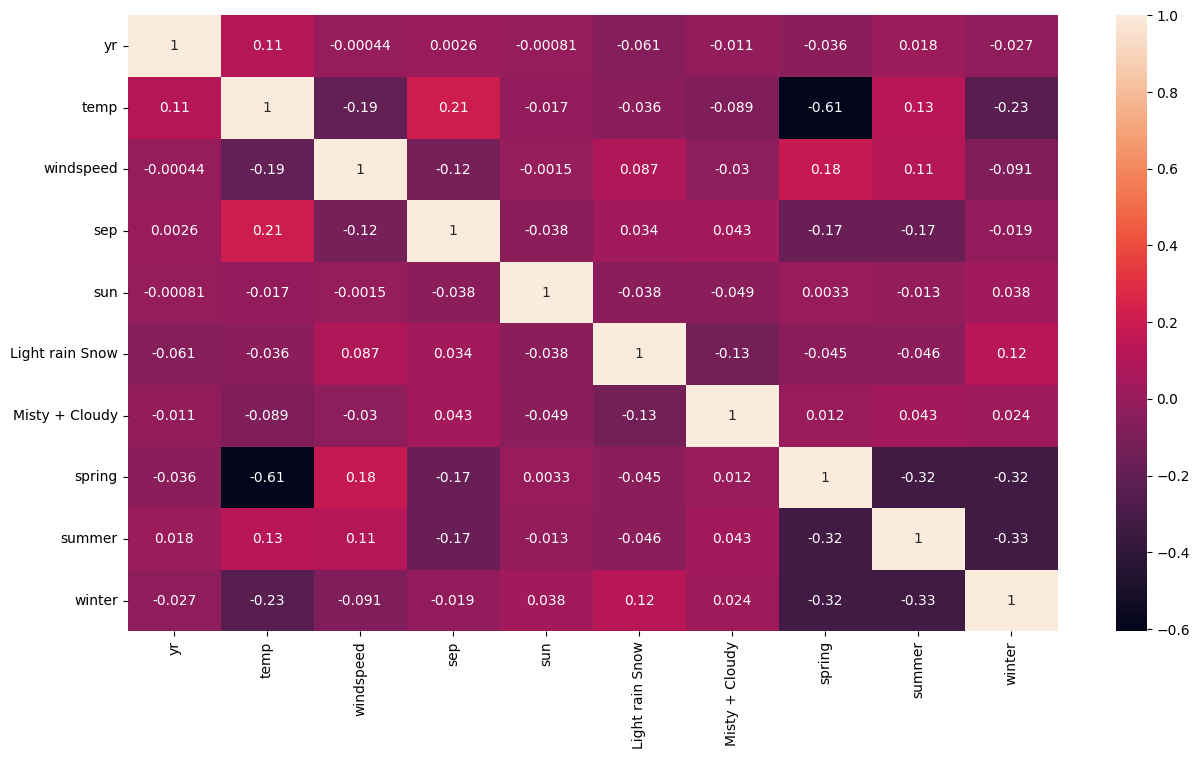

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

As we found in our VIF the Multicollinearity is less than 5 which is accepted and in heat map there is no multicoliearity

### Homoscedasticity

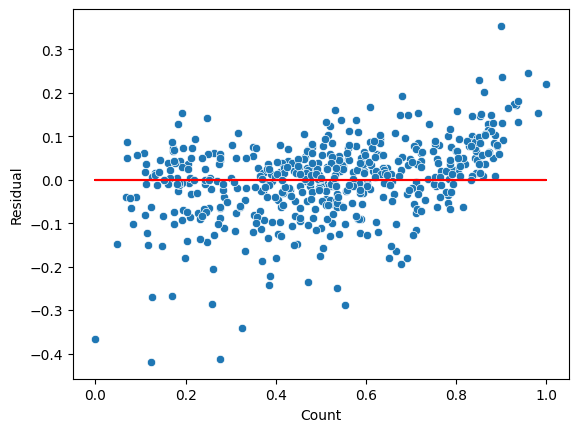

In [75]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Our figure points that 

# Making prediction 

In [76]:
scaler.feature_names_in_

array(['atemp', 'temp', 'hum', 'windspeed', 'cnt'], dtype=object)

In [77]:
num_vars =['atemp', 'temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light rain Snow,Misty + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


# Making Prediction

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)


#### Checking if the test and train have same columns 

In [80]:
print("Train columns:", X_train_LM_5.columns)
print("Test columns:", X_test_lm_5.columns)

# Check for missing columns in test set
print("Columns missing in X_test:", set(X_train_LM_5.columns) - set(X_test_lm_5.columns))


Train columns: Index(['const', 'yr', 'temp', 'windspeed', 'sep', 'sun', 'Light rain Snow',
       'Misty + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')
Test columns: Index(['const', 'yr', 'temp', 'windspeed', 'sep', 'sun', 'Light rain Snow',
       'Misty + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')
Columns missing in X_test: set()


In [81]:
y_pred = lm_5.predict(X_test_lm_5)

In [82]:
y_pred

184    0.502824
535    0.901474
299    0.405740
221    0.567438
152    0.569264
         ...   
702    0.730209
127    0.481757
640    0.794418
72     0.266859
653    0.723121
Length: 220, dtype: float64

# Evaluating the model


In [83]:
r2 = r2_score(y_test, y_pred)
r2

0.8031908103816627

Text(0, 0.5, 'y_pred')

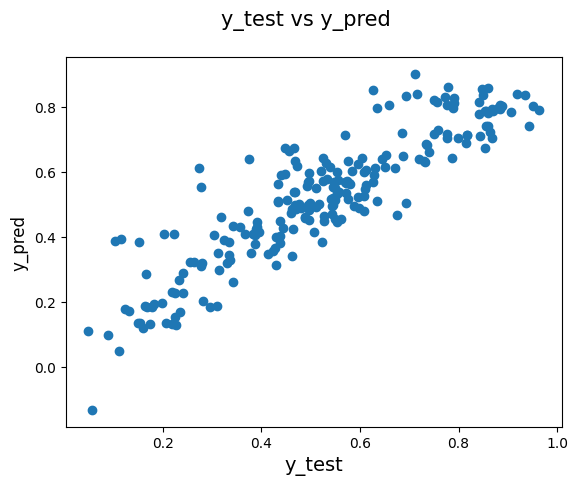

In [84]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [85]:

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7938


# Outcomes

The r-square score came to be 0.8032 and adjusted r-square score is 0.7938

### Key Factors Influencing Shared Bike Demand:

<ul>
  <li><strong>Temperature (temp):</strong> Warmer weather usually leads to an increase in bike usage.</li>
  <li><strong>Working Day (WorkingDay):</strong> Demand varies depending on whether it is a workday or a non-working day.</li>
  <li><strong>Windspeed:</strong> Stronger winds can discourage bike usage due to less favorable riding conditions.</li>
  <li><strong>Season:</strong> Different seasons have a notable impact on biking habits.</li>
  <li><strong>Months:</strong> Specific months, such as March, September, November, and December, exhibit unique demand trends.</li>
  <li><strong>Year:</strong> Long-term shifts in bike demand are influenced by yearly trends.</li>
  <li><strong>Weather Conditions (weathersit):</strong> Factors like clear skies or light rain can affect bike usage.</li>
</ul>
